# 0. Importações

In [1]:
# Para a implementação em si.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
# Para comparação com o Scikit Learn.
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

# 1. Introdução

A Regresão Logística é uma técnica utilizada para fazer **classificação binária**. Ela permite que um conjunto de ${n}$ variáveis de entrada, sejam contínuas ou discretas, possa ser classificado como pertencente a uma de duas classes (${0}$ ou ${1}$). Para isso, utilizamos a função **sigmóide**, mostrada a seguir:

$${y_{prob}} = \frac{1}{1 + e^{-z}}$$

Onde:
- A variável ${y_{prob}}$ indica a **probabilidade** da entrada ${z}$ pertencer à uma das duas classes;
- A variável ${z}$ é tal que ${z} = {f(w, b)} = {x_1w_1 + x_2w_2 + ... + x_nw_n} + {b}$, onde:
    - ${x}$ é o vetor de dados de entrada, que contém os parâmetros relacionados ao problema;
    - ${w}$ é o vetor de pesos, que devem ser ajustados de forma a minimizarem a função de custo;
    - ${b}$ é valor do viés, um parâmetro intríseco ao problema;

A função sigmóide é implementada a seguir:

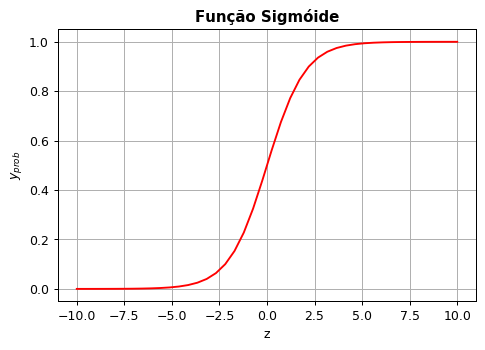

In [5]:
def sigmoide(z):
    return 1/(1 + np.exp(-z))

z = np.linspace(-10, 10, 42)
y_prob = sigmoide(z)

plt.figure(dpi=90)
plt.plot(z, y_prob, color='r')
plt.title('Função Sigmóide', fontweight="bold") 
plt.xlabel('z')
plt.ylabel('$y_{prob}$')
plt.grid()

## Função de Custo

A função de custo da regressão logística, chamada de *Binary Cross-Entropy* ou *Log Loss*, é definida como:

$$J(z) = - \frac{1}{N}\sum\limits_{i=1}^{N}{y_{rot(i)}}.log\left({y_{prob(i)}}\right) + \left({1} - {y_{rot(i)}}\right).log\left(1-{y_{prob(i)}}\right)$$

Onde:
- $J(z)$ é o valor da função de custo a ser minimizada;
- $N$ é a quantidade de amostras;
- $y_{rot(i)}$ representa a que classe a i-ésima amostra pertence. Ela **rotula** a amostra como ${0}$ ou ${1}$;
- $y_{prob(i)}$, como já discutido acima, representa a **probabilidade** i-ésima amostra pertencer a uma das classes;

Analisando a função de custo, vamos analisar o que acontece com ela em dois cenários diferentes:
- Quando $y_{rot(i)} = 0$, sobra apenas $log(1-{y_{prob(i)}})$ no segundo termo.
    - Nesse caso, quando ${y_{prob(i)}}$ tende a $0$, a função de custo também tende. Isso é **consistente**, pois o valor previsto bate com o esperado; 
    - Já quando ${y_{prob(i)}}$ tende a $1$, a função de custo tende a $\infty$, como pode ser visto na figura abaixo;

- Quando $y_{rot(i)} = 1$, sobra apenas $log({y_{prob(i)}})$ no primeiro termo.
    - Nesse caso, quando ${y_{prob(i)}}$ tende a $1$, a função de custo tende a zero. Isso é **consistente**, pois o valor previsto bate com o esperado;
    - Já quando ${y_{prob(i)}}$ tende a $0$, a função de custo tende a $\infty$, como pode ser visto na figura abaixo;


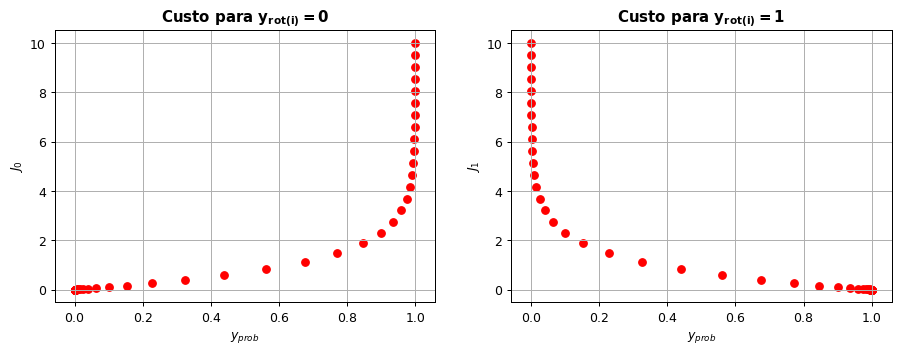

In [4]:
def J_0(y_prob):
    return - np.log(1 - y_prob)

J_0 = J_0(y_prob)

plt.figure(figsize=(12,4), dpi=90)
plt.subplot(121)
plt.scatter(y_prob, J_0, color='r')
plt.title('Custo para $\mathbf{y_{rot(i)} = 0}$', fontweight="bold") 
plt.xlabel('$y_{prob}$')
plt.ylabel('$J_{0}$')
plt.grid()

def J_1(y_prob):
    return - np.log(y_prob)

J_1 = J_1(y_prob)

plt.subplot(122)
plt.scatter(y_prob, J_1, color='r')
plt.title('Custo para $\mathbf{y_{rot(i)} = 1}$', fontweight="bold") 
plt.xlabel('$y_{prob}$')
plt.ylabel('$J_{1}$')
plt.grid()

## Derivada da função de custo

Vamos utilizar a técnica do **Gradiente Descendente** para ajustar o vetor de pesos ${w}$ de forma a minimizar a função de custo $J(z)$. Para isso, precisamos calcular as derivadas de $J(z)$ em relação a ${w}$ e a ${b}$.

Inicialmente, vamos manipular a função de custo para que ela passe a depender explicitamente de $z$. Isso facilitará o cálculo das derivadas mais adiante. Você também pode tentar utilizar diretamente a *Regra da Cadeia*, mas os cálculos podem ficar meio grandes, devido à natureza das funções envolvidas.

- Calculando $log\left({y_{prob(i)}}\right)$:

$$log\left({y_{prob(i)}}\right) = log\left(\frac{1}{1 + e^{-z}}\right) = log\left(1\right) - log\left({1 + e^{-z}}\right) = - log\left({1 + e^{-z}}\right)$$

- Calculando $log\left(1 - {y_{prob(i)}}\right)$:

$$log\left(1 - {y_{prob(i)}}\right) = log\left(1 - \frac{1}{1 + e^{-z}}\right) = log\left(\frac{{1 + e^{-z}} - 1}{1 + e^{-z}}\right) = log\left(e^{-z}\right) - log\left({1 + e^{-z}}\right) = -z - log\left({1 + e^{-z}}\right)$$

- Substituindo esses valores na função de custo e simplificando os termos, obtemos que:

$$J(z) = - \frac{1}{N}\sum\limits_{i=1}^{N}{y_{rot(i)}}.z - log\left({1 + e^{z}}\right)$$

- E definimos acima que:

$${z} = {f(w, b)} = {x_1w_1 + x_2w_2 + ... + x_nw_n} + {b}$$

- Finalmente, calculamos as derivadas parciais:

$$\frac {\partial {}} {\partial {}} = $$

# 2. Dados

Utilizando o dataset tal, que possui como variáveis independetes a *idade* e o *salário* de várias pessoas, vamos tentar classificá-las em uma de duas classes:
    
- As que **compraram** determinado produto, representadas por $y_{rot(i)} = 1$;
- E as que **não compraram**, representadas por $y_{rot(i)} = 0$;,

Os dados são importados a seguir: